# Exploratory Data Analysis-2

<hr style="border: 2px solid black">

### Flight Price

---
#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd

# Load the dataset
ds = pd.read_excel('flight_price.xlsx')

# Check dimensions
num_rows, num_columns = ds.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10683
Number of columns: 11


---
#### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

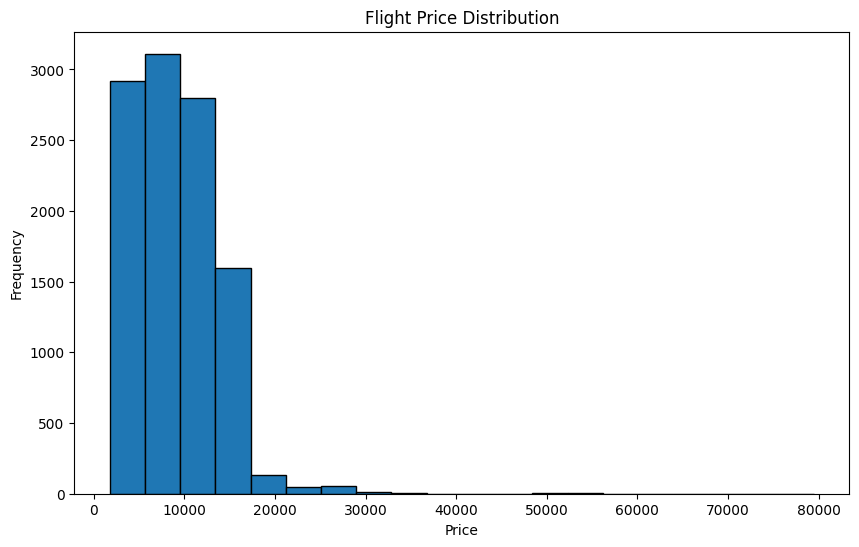

In [2]:
import pandas as pd
import matplotlib.pyplot as pt

# Load the flight price dataset (replace 'flight_price_dataset.csv' with our dataset file)
ds = pd.read_excel('flight_price.xlsx')

# Create a histogram
pt.figure(figsize=(10, 6))
pt.hist(ds['Price'], bins=20, edgecolor='k')
pt.xlabel('Price')
pt.ylabel('Frequency')
pt.title('Flight Price Distribution')
pt.show()

---
#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [3]:
import pandas as pd

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Find the minimum and maximum prices
min_price = ds['Price'].min()
max_price = ds['Price'].max()

# Calculate the price range
price_range = max_price - min_price

# Print the results
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


---
#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

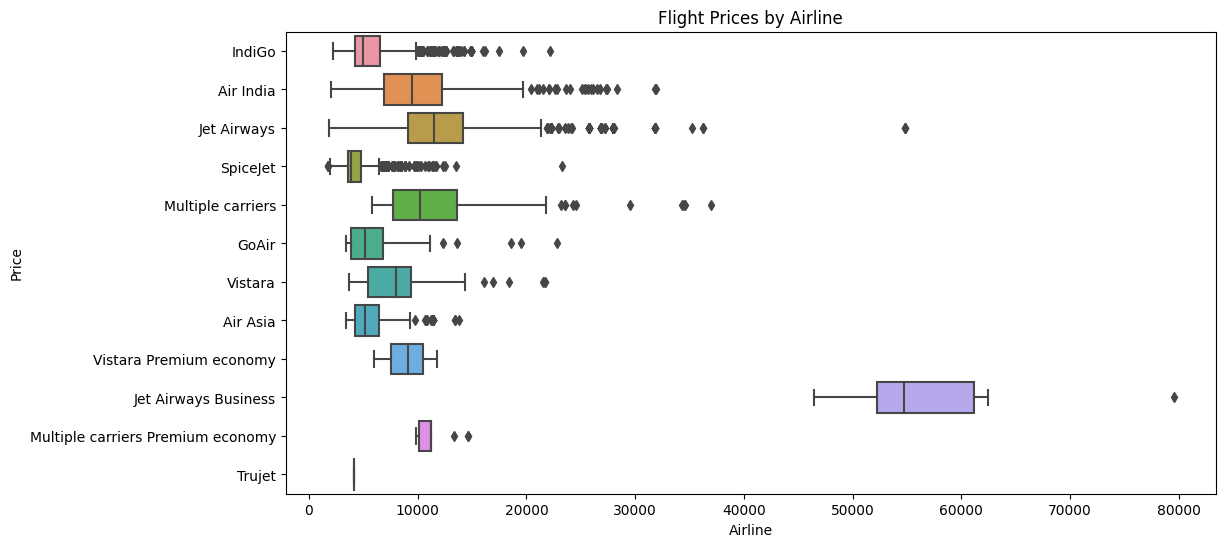

In [4]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Create a boxplot to compare prices by airline
pt.figure(figsize=(12, 6))
sb.boxplot(y='Airline', x='Price', data=ds)
pt.xlabel('Airline')
pt.ylabel('Price')
pt.title('Flight Prices by Airline')
pt.show()

---
#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

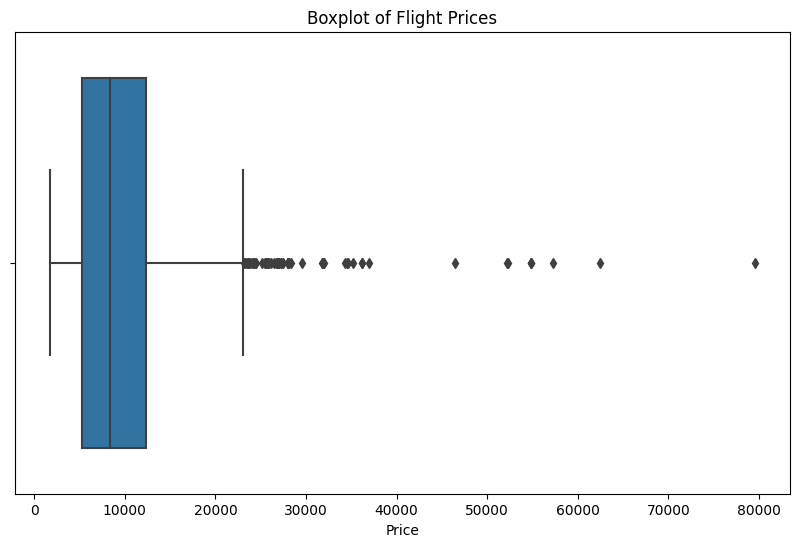

Potential Outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   

In [5]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Calculate the first quartile (Q1)
Q1 = ds['Price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = ds['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
potential_outliers = ds[(ds['Price'] < lower_bound) | (ds['Price'] > upper_bound)]

# Create a boxplot to visualize potential outliers
pt.figure(figsize=(10, 6))
sb.boxplot(x='Price', data=ds)
pt.xlabel('Price')
pt.title('Boxplot of Flight Prices')
pt.show()

# Print the potential outliers
print("Potential Outliers:")
print(potential_outliers)

The impact of outliers on our analysis:
- Outliers can skew summary statistics, such as the mean and standard deviation.
- Some machine learning algorithms, like linear regression, can be sensitive to outliers and may produce biased results.
- Outliers can affect the normality of data distribution, which is often assumed in statistical tests.
- Decisions about handling outliers (e.g., removing or transforming them) should be made based on domain knowledge and the specific goals of our analysis.

---
#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\2268716559.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])


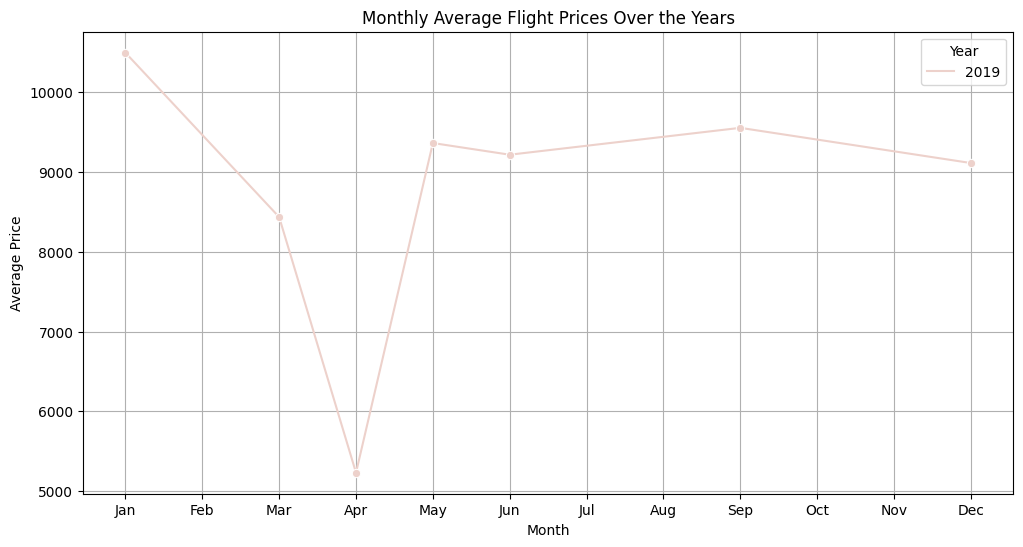

In [6]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Assuming our dataset has a 'Date' column with date information
# Convert the 'Date' column to datetime format
ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])

# Extract month and year from the 'Date' column
ds['Month'] = ds['Date_of_Journey'].dt.month
ds['Year'] = ds['Date_of_Journey'].dt.year

# Group data by month and calculate the average price for each month
monthly_avg_prices = ds.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create a line plot to visualize monthly price trends
pt.figure(figsize=(12, 6))
sb.lineplot(data=monthly_avg_prices, x='Month', y='Price', hue='Year', marker='o')
pt.xlabel('Month')
pt.ylabel('Average Price')
pt.title('Monthly Average Flight Prices Over the Years')
pt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pt.legend(title='Year')
pt.grid(True)
pt.show()

---
#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

As a data analyst for a flight booking website, analyzing the Flight Price dataset to identify trends in flight prices is crucial for understanding market dynamics and making informed decisions. Here are the features we would analyze to identify these trends and the visualizations to present our findings to our team:

**Features to Analyze:**
1. **Date of the Flight:** Analyze how flight prices change over time. Look for seasonal trends, price fluctuations on specific dates, and long-term price trends.
2. **Source and Destination:** Investigate whether flight prices vary based on the specific source or destinations. Certain routes may have more stable prices, while others may be subject to pricing volatility.
3. **Airline:** Examine how different airlines price their flights. Identify airlines with consistently lower or higher prices.

C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\344215569.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])


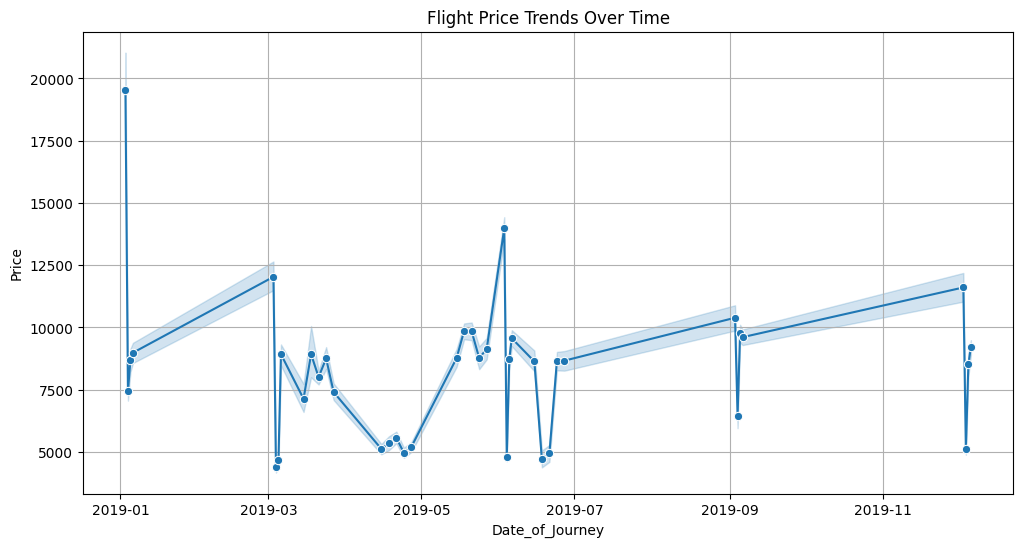

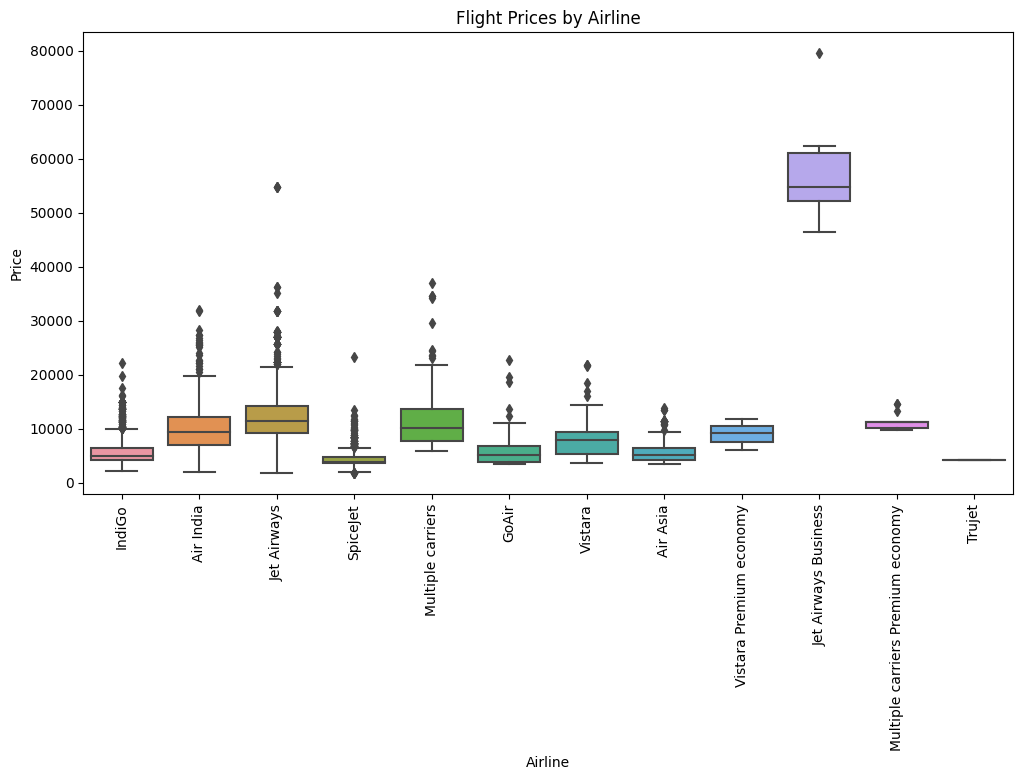

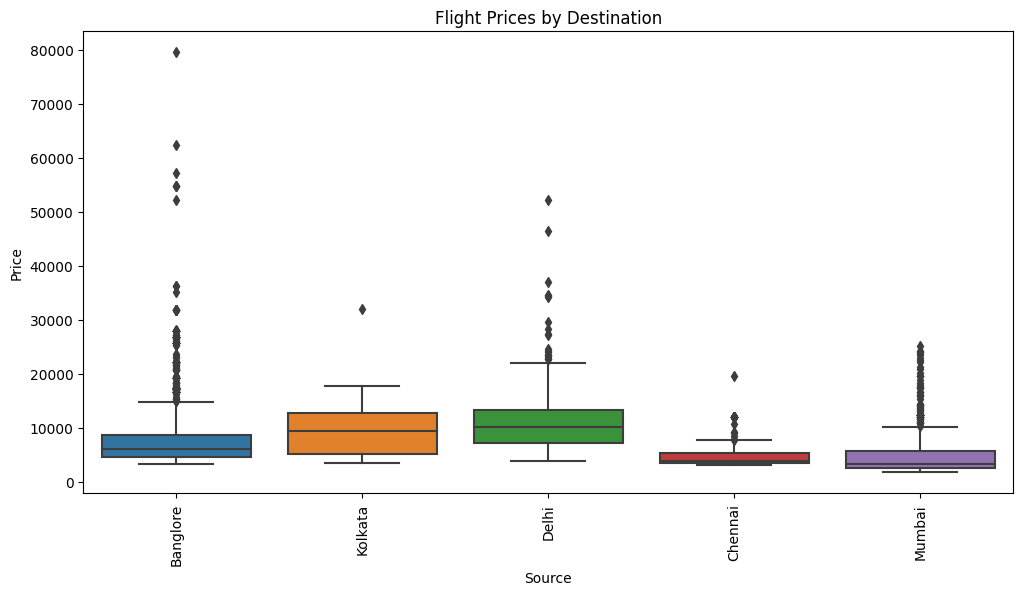

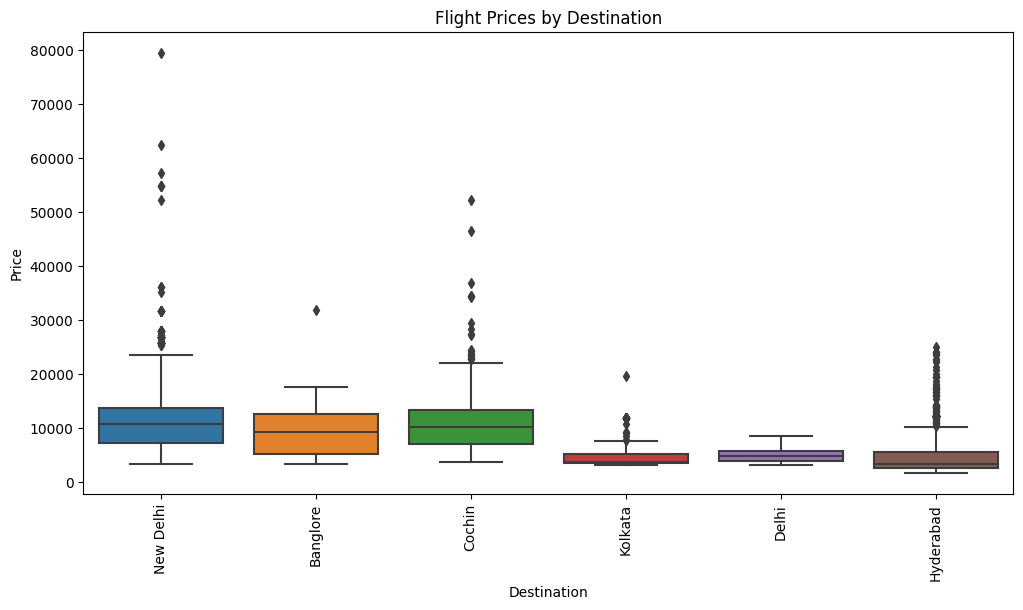

In [7]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Convert the 'Date' column to datetime
ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])

# Extract month and year from the 'Date' column
ds['Month'] = ds['Date_of_Journey'].dt.month
ds['Year'] = ds['Date_of_Journey'].dt.year

# Time Series Plot: Analyzing flight prices over time
pt.figure(figsize=(12, 6))
sb.lineplot(data=ds, x='Date_of_Journey', y='Price', marker='o')
pt.xlabel('Date_of_Journey')
pt.ylabel('Price')
pt.title('Flight Price Trends Over Time')
pt.grid(True)
pt.show()

# Boxplot: Comparing flight prices by airline
pt.figure(figsize=(12, 6))
sb.boxplot(x='Airline', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Airline')
pt.ylabel('Price')
pt.title('Flight Prices by Airline')
pt.show()

# Boxplot: Comparing flight prices by source
pt.figure(figsize=(12, 6))
sb.boxplot(x='Source', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Source')
pt.ylabel('Price')
pt.title('Flight Prices by Destination')
pt.show()

# Boxplot: Comparing flight prices by destination
pt.figure(figsize=(12, 6))
sb.boxplot(x='Destination', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Destination')
pt.ylabel('Price')
pt.title('Flight Prices by Destination')
pt.show()

---
#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

As a data scientist working for an airline company, analyzing the Flight Price dataset to identify the factors that affect flight prices is essential for pricing strategies and decision-making. Here are the features we would analyze to identify these factors and how we can present our findings to the management team:

**Features to Analyze:**
1. **Date of the Flight:** Analyze how flight prices vary by date, day of the week, and time of day. Consider seasonal, holiday, and weekend effects.
2. **Source and Destination:** Investigate how different routes and destinations impact pricing. Some routes may be more competitive than others.
3. **Airline:** Examine how different airlines price their flights. Identify airlines with higher or lower average prices and pricing strategies.
4. **Booking Class:** Analyze pricing variations among different booking classes (economy, business, first class).
5. **Advance Booking:** Study how the timing of booking affects flight prices. Identify if booking well in advance or last-minute has an impact.
6. **Duration of Stay:** Analyze how the duration of stay (for round-trip flights) affects pricing.
7. **Additional Fees:** Consider analyzing the impact of additional fees such as baggage fees, seat selection, and in-flight services on the total price.
8. **Promotions and Discounts:** Explore if promotions, discounts, or loyalty programs influence pricing.
9. **Competitor Pricing:** If available, consider competitor pricing data to assess how our airline's prices compare to competitors.
10. **Customer Segmentation:** Analyze if different customer segments (e.g., business travelers, leisure travelers) have varying price sensitivity.

C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\855778806.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])


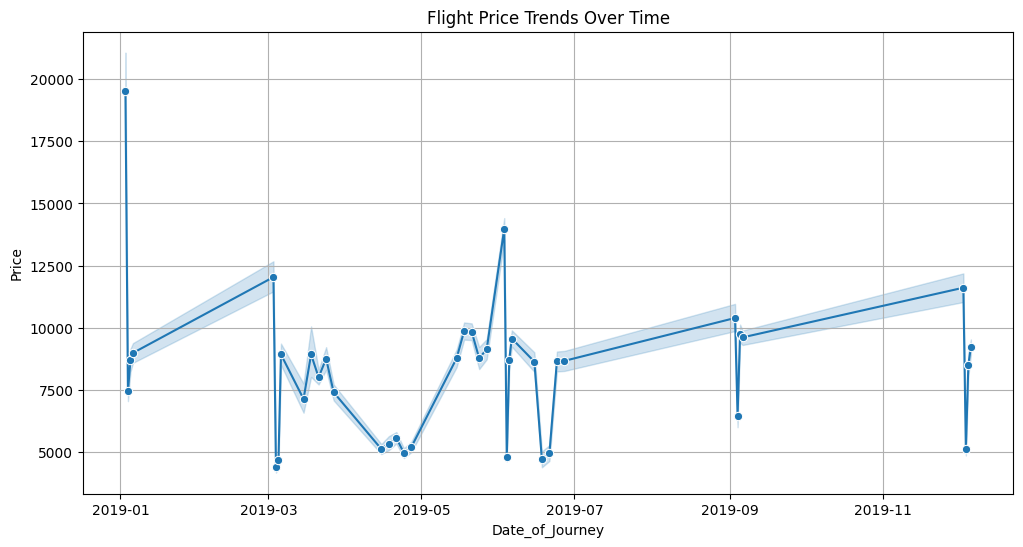

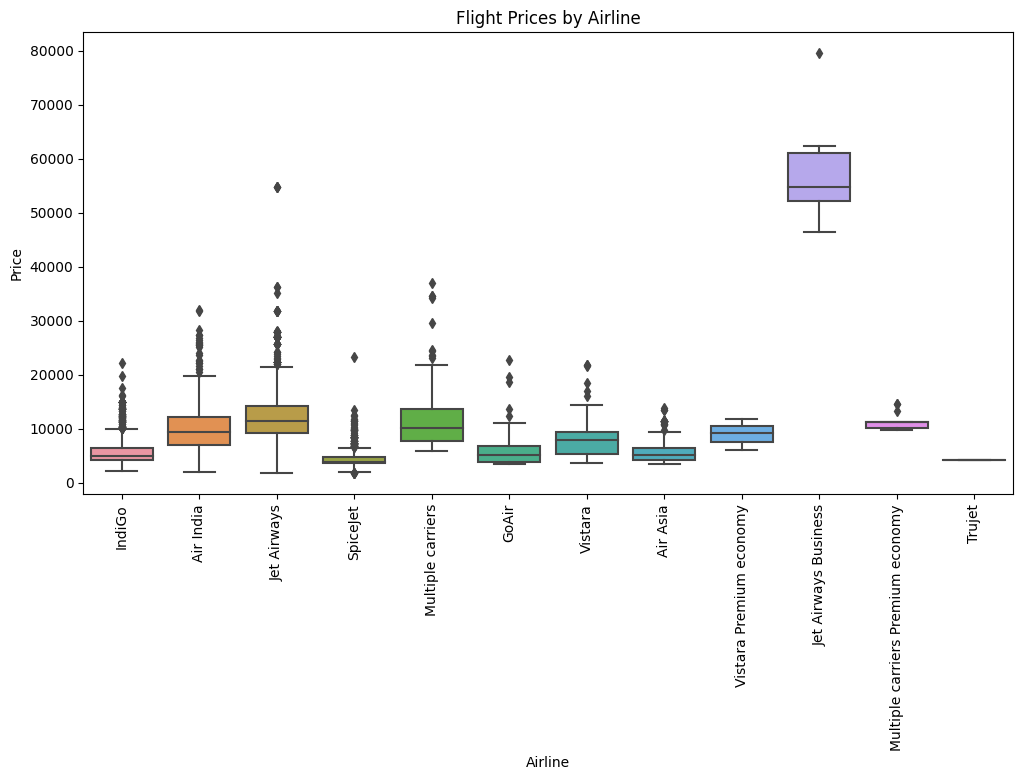

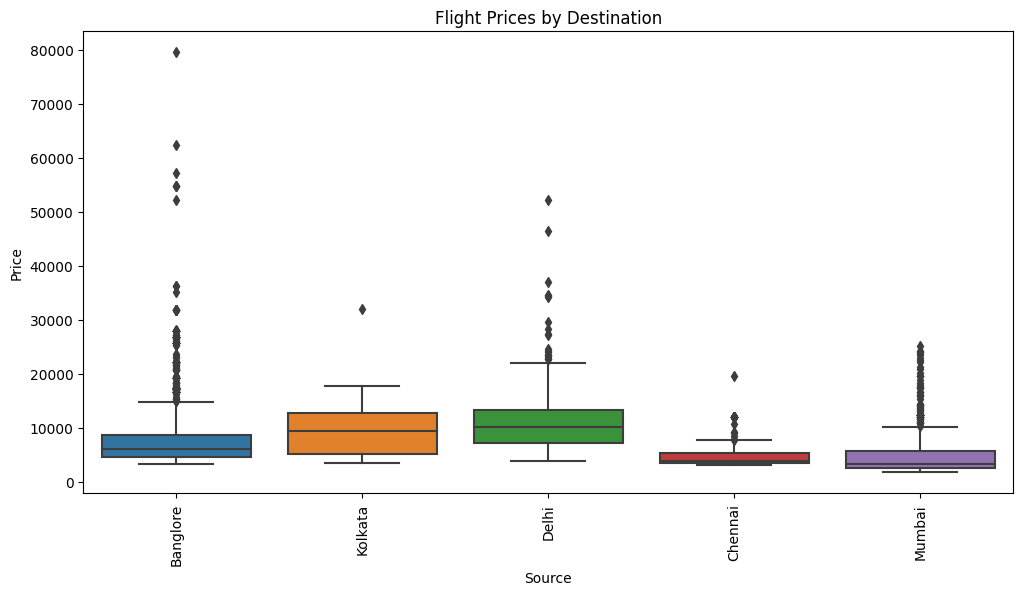

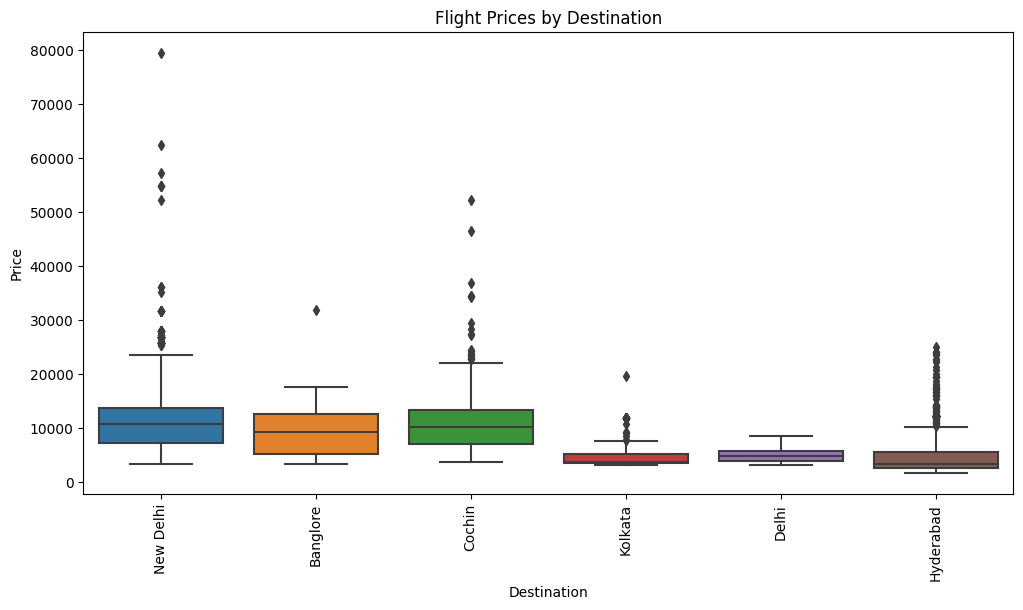

In [8]:
# Few examples are here
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the flight price dataset
ds = pd.read_excel('flight_price.xlsx')

# Convert the 'Date' column to datetime
ds['Date_of_Journey'] = pd.to_datetime(ds['Date_of_Journey'])

# Extract month and year from the 'Date' column
ds['Month'] = ds['Date_of_Journey'].dt.month
ds['Year'] = ds['Date_of_Journey'].dt.year

# Time Series Plot: Analyzing flight prices over time
pt.figure(figsize=(12, 6))
sb.lineplot(data=ds, x='Date_of_Journey', y='Price', marker='o')
pt.xlabel('Date_of_Journey')
pt.ylabel('Price')
pt.title('Flight Price Trends Over Time')
pt.grid(True)
pt.show()

# Boxplot: Comparing flight prices by airline
pt.figure(figsize=(12, 6))
sb.boxplot(x='Airline', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Airline')
pt.ylabel('Price')
pt.title('Flight Prices by Airline')
pt.show()

# Boxplot: Comparing flight prices by source
pt.figure(figsize=(12, 6))
sb.boxplot(x='Source', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Source')
pt.ylabel('Price')
pt.title('Flight Prices by Destination')
pt.show()

# Boxplot: Comparing flight prices by destination
pt.figure(figsize=(12, 6))
sb.boxplot(x='Destination', y='Price', data=ds)
pt.xticks(rotation=90)
pt.xlabel('Destination')
pt.ylabel('Price')
pt.title('Flight Prices by Destination')
pt.show()

<hr style="border: 2px solid black">

### Google Playstore:

---
#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [9]:
import pandas as pd

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Get the dimensions of the dataset (number of rows and columns)
num_rows, num_columns = ds.shape

# Print the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10841
Number of columns: 13


---
#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

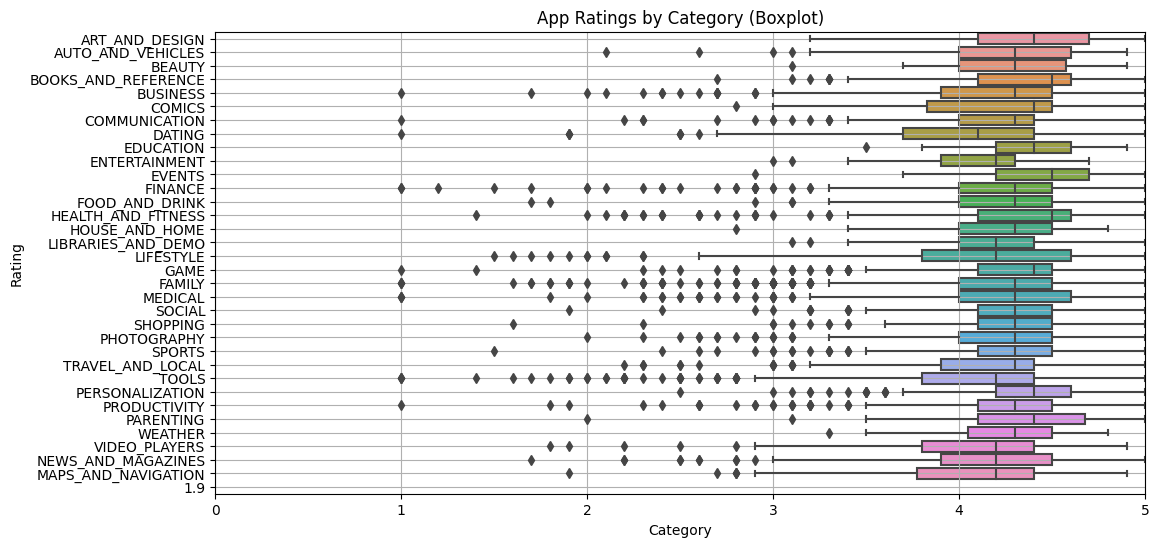

In [10]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Create a boxplot to compare ratings by category
pt.figure(figsize=(12, 6))
sb.boxplot(data=ds, y='Category', x='Rating')
pt.xlabel('Category')
pt.ylabel('Rating')
pt.xlim(0, 5)
pt.title('App Ratings by Category (Boxplot)')
pt.grid(True)
pt.show()

---
#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [11]:
import pandas as pd

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Check for missing values
missing_values = ds.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values)

# Check if there are any rows with missing values
rows_with_missing_values = ds[ds.isnull().any(axis=1)]

# Print the number of rows with missing values
print("\nNumber of Rows with Missing Values:", len(rows_with_missing_values))

Missing Values Count:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Number of Rows with Missing Values: 1481


Understanding missing values is crucial because they can impact our analysis in the following ways:
- **Bias**: Missing values can introduce bias if they are not handled appropriately. Rows with missing data may not represent the overall population accurately.
- **Reduced Sample Size**: Missing data can reduce the effective sample size for our analysis, potentially reducing statistical power.
- **Inaccurate Statistics**: Summary statistics, correlations, and visualizations may be inaccurate if missing values are not appropriately handled.
- **Model Performance**: If we plan to build predictive models, missing values can lead to errors or biased predictions.

---
#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\578936268.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].apply(convert_size)


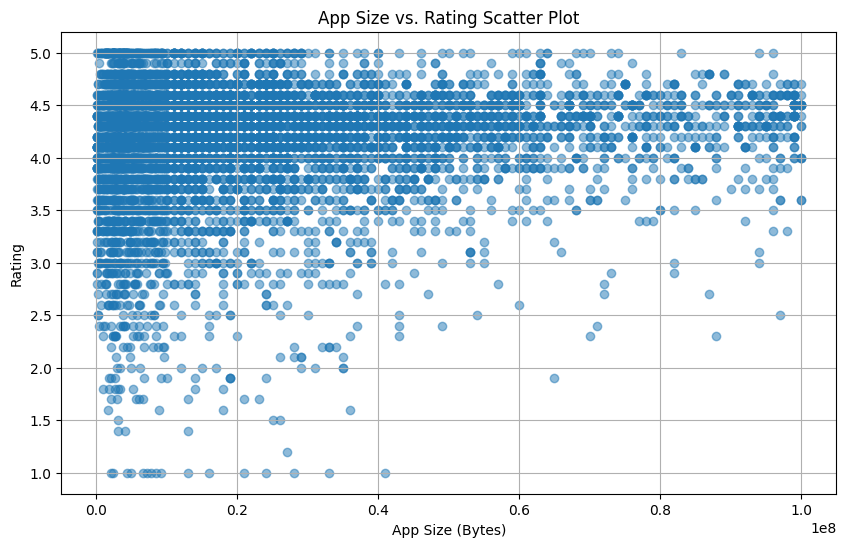

In [12]:
import pandas as pd
import matplotlib.pyplot as pt

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Filter out rows with missing values in the 'Size' and 'Rating' columns
df = ds.dropna(subset=['Size', 'Rating'])

# Function to convert the 'Size' column to a numeric format
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').replace(',', '')) * 1000000
    elif 'k' in size:
        return float(size.replace('k', '').replace(',', '')) * 1000
    else:
        return None  # Handle 'Varies with device' or other cases

# Apply the conversion function to the 'Size' column
df['Size'] = df['Size'].apply(convert_size)

# Remove rows with missing or invalid sizes
df = df.dropna(subset=['Size'])

# Create a scatter plot to visualize the relationship between app size and rating
pt.figure(figsize=(10, 6))
pt.scatter(df['Size'], df['Rating'], alpha=0.5)
pt.xlabel('App Size (Bytes)')
pt.ylabel('Rating')
pt.title('App Size vs. Rating Scatter Plot')
pt.grid(True)
pt.show()

---
#### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\1769826591.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)
C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\1769826591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


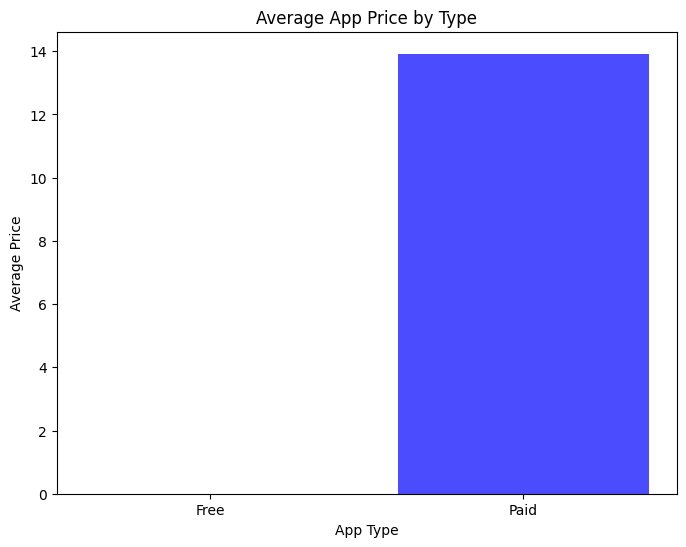

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Filter the dataset to include only Paid apps
df = ds[ds['Type'] == 'Paid']

# Convert the 'Price' column to a numeric format by removing the dollar sign and converting to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Calculate the average price of Paid apps
average_paid_app_price = df['Price'].mean()

# Filter the dataset to include only Free apps
free_apps_data = ds[ds['Type'] == 'Free']

# Calculate the average price of Free apps (should be 0 as they are free)
average_free_app_price = 0.0

# Create a bar chart to compare average prices by app type
pt.figure(figsize=(8, 6))
pt.bar(['Free', 'Paid'], [average_free_app_price, average_paid_app_price], color=['green', 'blue'], alpha=0.7)
pt.xlabel('App Type')
pt.ylabel('Average Price')
pt.title('Average App Price by Type')
pt.show()

---
#### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [14]:
import pandas as pd

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Extract the 'App' and 'Installs' columns
df = ds[['App', 'Installs']]

# Remove any non-numeric characters from the 'Installs' column and convert it to an integer (replace empty strings with 0)
df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).replace('', '0').astype(int)

# Sort the data by the number of installs in descending order
sorted_app_installs = df.sort_values(by='Installs', ascending=False)

# Get the top 10 most popular apps
top_10_apps = sorted_app_installs.head(10)

# Display the top 10 most popular apps
print(top_10_apps)

                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000


C:\Users\SALESKEN\AppData\Local\Temp\ipykernel_8292\361981914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).replace('', '0').astype(int)


---
#### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories for a new app launch on the Google Playstore, we can follow these steps:
1. **Data Preparation**:
   - Load the Google Playstore dataset.
   - Ensure that the dataset is clean and does not contain missing or irrelevant data.
2. **Exploratory Data Analysis (EDA)**:
   - Conduct exploratory data analysis to understand the dataset's characteristics.
   - Analyze the distribution of app categories in the dataset to identify which categories have a significant presence.
3. **Popularity Metrics**:
   - Define popularity metrics that will help us to measure the popularity of an app category. Popular metrics might include the number of installs, user ratings, and reviews.
4. **Grouping by Category**:
   - Group the dataset by app category and calculate the aggregate popularity metrics for each category. For example, calculate the total number of installs or average user ratings for each category.
5. **Ranking Categories**:
   - Rank the app categories based on their popularity metrics. We can use sorting functions to identify the top categories.
6. **Visualization**:
   - Create visualizations, such as bar charts or pie charts, to represent the popularity of app categories visually.
7. **Recommendations**:
   - Based on the analysis, provide recommendations to the company regarding the most popular app categories.
   - Consider the company's goals, target audience, and the competitive landscape when making recommendations.

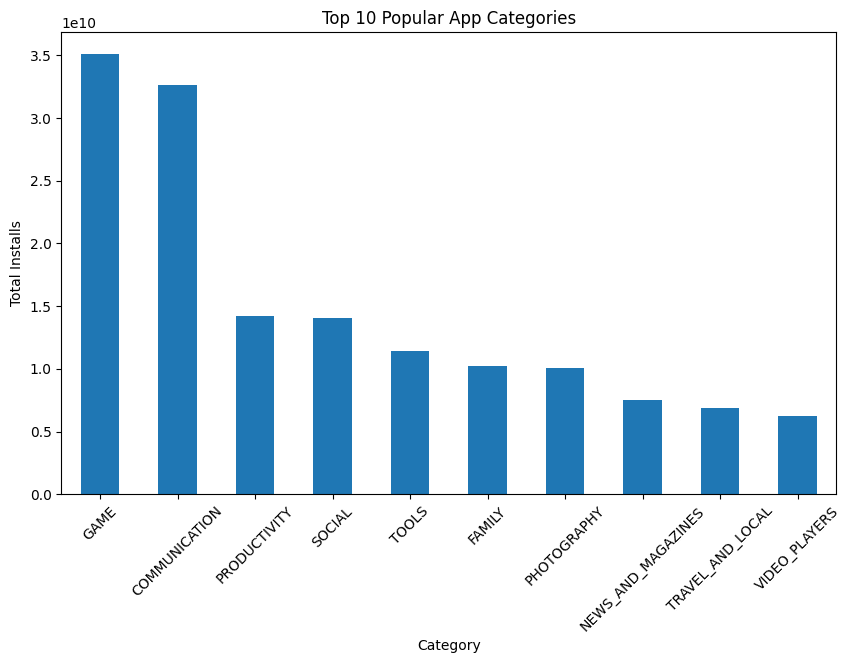

In [15]:
import pandas as pd
import matplotlib.pyplot as pt

# Load the Google Playstore dataset into a Pandas DataFrame
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Replace empty values in the 'Installs' column with zeros
ds['Installs'] = ds['Installs'].str.replace('[^\d]', '', regex=True).replace('', '0')

# Convert the 'Installs' column to integers
ds['Installs'] = ds['Installs'].astype(int)

# Define popularity metrics (e.g., Installs, Rating, Reviews)
popularity_metric = 'Installs'

# Group the data by app category and calculate the total popularity metric for each category
category_popularity = ds.groupby('Category')[popularity_metric].sum()

# Sort the categories by popularity in descending order
sorted_categories = category_popularity.sort_values(ascending=False)

# Plot the top N popular app categories
top_categories = sorted_categories.head(10)
top_categories.plot(kind='bar', figsize=(10, 6))
pt.title('Top 10 Popular App Categories')
pt.xlabel('Category')
pt.ylabel('Total ' + popularity_metric)
pt.xticks(rotation=45)
pt.show()

---
#### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, we can analyze various features that indicate an app's success. Here are some features to consider and the corresponding data visualizations to present our findings:
1. **Number of Installs**: Analyze the total number of installs for apps developed by each developer. This can be a key indicator of success.
   - Data Visualization: Create a bar chart or a treemap to show the total number of installs for each developer.
2. **Average Rating**: Calculate the average rating for apps developed by each developer. High ratings can indicate user satisfaction.
   - Data Visualization: Create a bar chart or a scatter plot to visualize the average rating for each developer.
3. **Number of Reviews**: Analyze the total number of reviews for apps developed by each developer. More reviews can suggest a larger user base and engagement.
   - Data Visualization: Create a bar chart or a scatter plot to show the total number of reviews for each developer.
4. **App Category**: Investigate the distribution of app categories developed by each developer. Some developers may specialize in specific categories.
   - Data Visualization: Create a bar chart or a pie chart to display the distribution of app categories for each developer.
5. **App Size and Price**: Examine the average app size and price for apps developed by each developer. This can help identify trends in app offerings.
   - Data Visualization: Create a scatter plot or a pair of bar charts to compare app size and price among developers.
6. **Release Frequency**: Calculate how frequently each developer releases new apps or updates existing ones. Frequent updates may indicate active development.
   - Data Visualization: Create a line chart or a histogram to visualize the release frequency over time for each developer.
7. **Revenue (if available)**: If revenue data is available, analyze the total revenue generated by apps developed by each developer.
   - Data Visualization: Create a bar chart or a stacked bar chart to show the total revenue for each developer, broken down by app.
8. **User Engagement**: Analyze user engagement metrics, such as daily active users (DAU) or monthly active users (MAU), if available.
   - Data Visualization: Create line charts or area charts to visualize user engagement trends over time.
9. **Cross-App Promotion**: Investigate whether developers promote their other apps within their apps. Analyze how often users click on these promotions.
   - Data Visualization: Create a heatmap or a network graph to show the relationships between apps developed by the same developer.

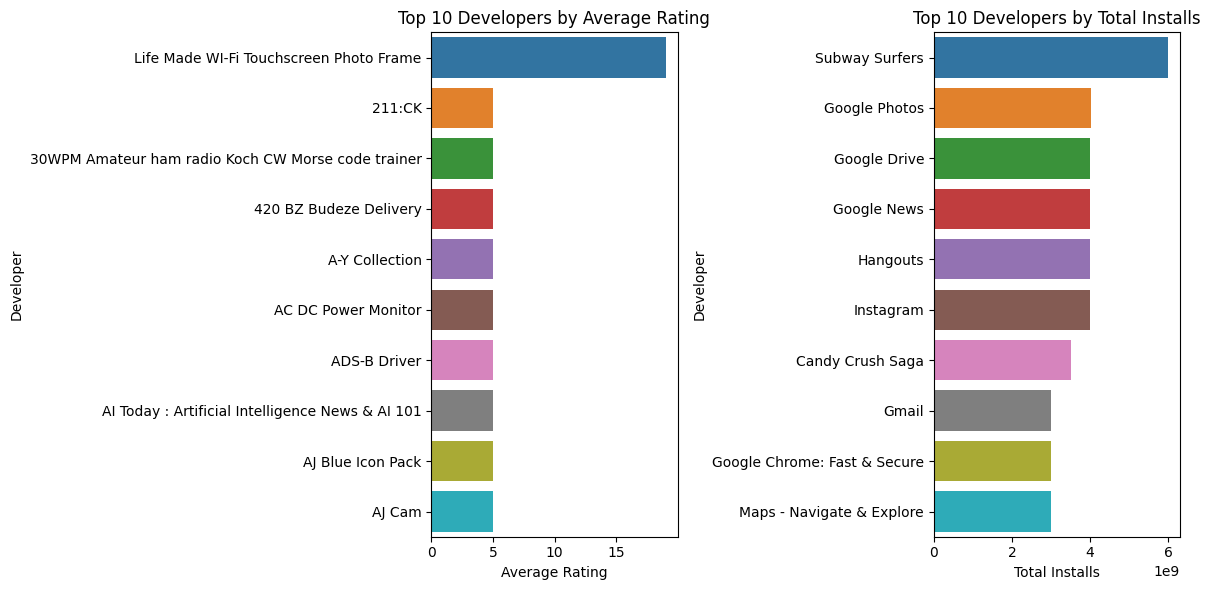

In [16]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the Google Playstore dataset
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Data Cleaning and Preprocessing
# Remove rows with missing values in critical columns
ds = ds.dropna(subset=['App', 'Rating', 'Installs'])

# Function to clean and convert the 'Installs' column
def clean_installs(installs):
    try:
        return int(installs.replace(',', '').replace('+', '').strip())
    except ValueError:
        return 0  # Assigning 0 as a default value for non-numeric entries

ds['Installs'] = ds['Installs'].apply(clean_installs)

# Extract developer information from the 'App' column
ds['Developer'] = ds['App'].str.split(' by ').str[-1]

# Calculate the average rating for each developer
developer_ratings = ds.groupby('Developer')['Rating'].mean().reset_index()

# Calculate the total number of installs for each developer
developer_installs = ds.groupby('Developer')['Installs'].sum().reset_index()

# Data Visualization
# Visualization 1: Average Rating by Developer
pt.figure(figsize=(12, 6))
pt.subplot(121)
sb.barplot(x='Rating', y='Developer', data=developer_ratings.nlargest(10, 'Rating'))
pt.title('Top 10 Developers by Average Rating')
pt.xlabel('Average Rating')

# Visualization 2: Total Installs by Developer
pt.subplot(122)
sb.barplot(x='Installs', y='Developer', data=developer_installs.nlargest(10, 'Installs'))
pt.title('Top 10 Developers by Total Installs')
pt.xlabel('Total Installs')

pt.tight_layout()
pt.show()

---
#### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To help a marketing research firm identify the best time to launch a new app on the Google Play Store, we can analyze various features and use data visualizations to present our findings. Here's a step-by-step approach:
* **1. Data Preparation:**
   - Load the Google Play Store dataset.
   - Ensure the relevant columns are available, such as 'Last Updated' and 'Category.'
   - Convert the 'Last Updated' column to a datetime format.
* **2. Feature Analysis:**
   - Analyze the 'Last Updated' column to understand trends over time.
   - Calculate the average number of apps updated in each time period (e.g., month or year).
   - Examine the 'Category' column to identify popular app categories.
* **3. Data Visualization:**
   - **Line Chart:** Create a line chart to visualize the number of app updates over time. This will help identify trends in app updates and whether there is a specific time of year when more updates occur.
   - **Bar Chart:** Create a bar chart to show the distribution of app updates by month or year. This can reveal whether certain months or years have higher update activity.
   - **Bar Chart (Category-wise):** Generate a bar chart to display the number of updates in each app category over time. This can help identify categories with higher update frequencies.
   - **Heatmap:** Create a heatmap to visualize app updates by day of the week and time of day. This can show when app updates are most common during the week.
   - **Box Plot:** Use a box plot to display the distribution of app update frequencies by month or year. It can help identify outliers or unusual patterns.
* **4. Recommendations:**
   - Based on the analysis and visualizations, provide recommendations on the best time to launch a new app.
   - Consider factors such as seasonality, category trends, and periods with lower update activity.
* **5. Further Analysis (Optional):**
   - Perform sentiment analysis on user reviews to understand user feedback trends over time.
   - Analyze user engagement metrics (e.g., installs, reviews) in relation to app update frequency.

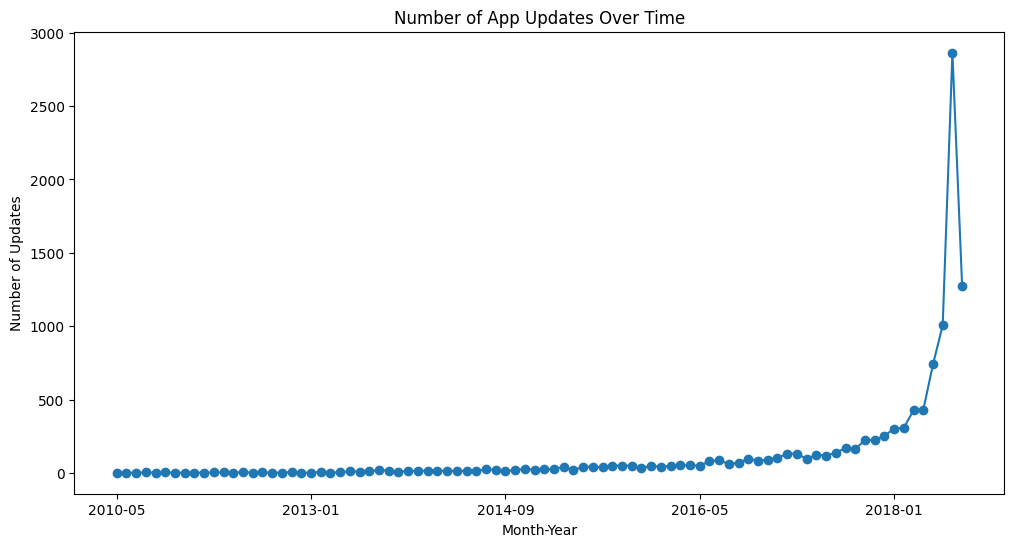

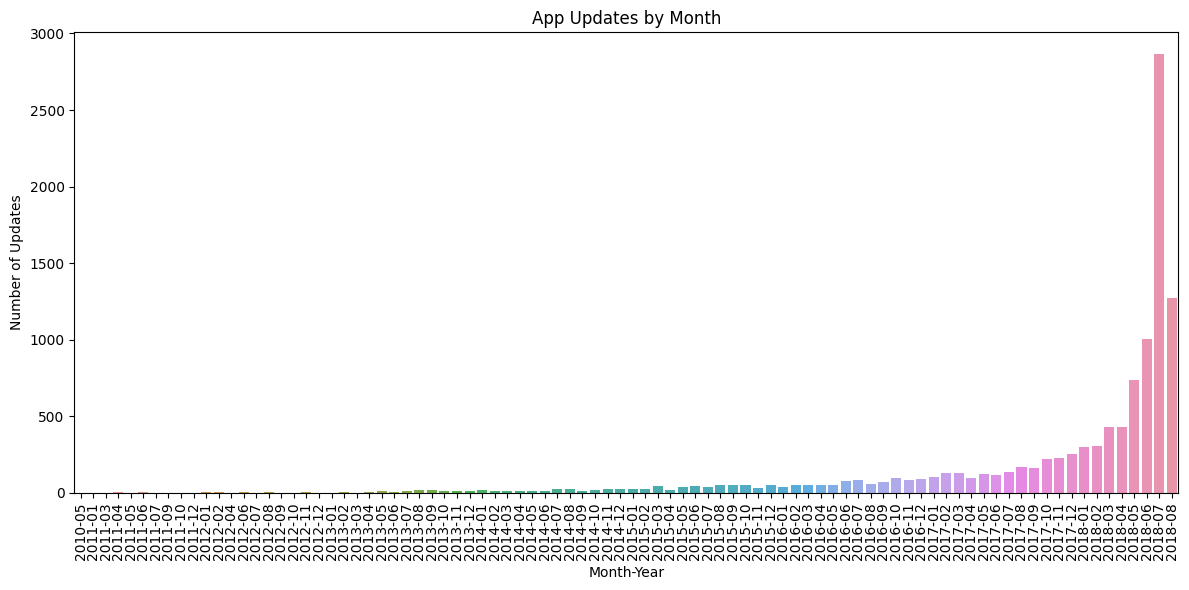

In [17]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the Google Play Store dataset
ds = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Data Preparation
# Clean the 'Last Updated' column by removing rows with invalid dates
ds = ds.dropna(subset=['Last Updated'])  # Drop rows with missing 'Last Updated' values

# Convert the 'Last Updated' column to a datetime format
ds['Last Updated'] = pd.to_datetime(ds['Last Updated'], errors='coerce')

# Remove rows with invalid 'Last Updated' values (NaT)
ds = ds.dropna(subset=['Last Updated'])

# Extract month and year from the 'Last Updated' column
ds['Update Month'] = ds['Last Updated'].dt.strftime('%Y-%m')

# Data Visualization
pt.figure(figsize=(12, 6))

# Line Chart: Number of app updates over time
update_counts = ds['Update Month'].value_counts().sort_index()
update_counts.plot(kind='line', marker='o')
pt.title('Number of App Updates Over Time')
pt.xlabel('Month-Year')
pt.ylabel('Number of Updates')

# Bar Chart: App updates by month
pt.figure(figsize=(12, 6))
sb.countplot(data=ds, x='Update Month', order=update_counts.index)
pt.title('App Updates by Month')
pt.xlabel('Month-Year')
pt.ylabel('Number of Updates')
pt.xticks(rotation=90)

pt.tight_layout()
pt.show()